<a href="https://www.kaggle.com/code/armanasgharpoor1993/coco-image-segmentation?scriptVersionId=138553552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Тutorial по сегментации изображений с использованием глубокого обучения**

В этом уроке мы исследуем тему сегментации изображений с использованием глубокого обучения. Сегментация изображений — это важная задача компьютерного зрения, которая заключается в разделении изображения на несколько сегментов или областей для облегчения анализа и понимания. Техники глубокого обучения, особенно свёрточные нейронные сети (CNN), продемонстрировали выдающиеся результаты в задачах сегментации изображений, благодаря своей способности обучаться сложным визуальным представлениям непосредственно из данных.

## Введение в сегментацию изображений

Сегментация изображений играет ключевую роль в различных приложениях компьютерного зрения, включая детекцию объектов, семантическое понимание, медицинскую визуализацию и автономное вождение. Цель сегментации — идентифицировать и очертить значимые области на изображении, что позволяет проводить детальный анализ и понимать визуальное содержание. Присваивая метки или маски отдельным пикселям или группам пикселей, сегментация изображений предоставляет подробное понимание объектов, границ и контекста на изображении.

### Типы сегментации изображений

Существует несколько типов техник сегментации изображений, каждая из которых решает разные аспекты задачи сегментации:

1. **Семантическая сегментация**: Семантическая сегментация присваивает каждому пикселю на изображении метку класса, эффективно классифицируя его в значимые объектные классы. Например, в сценарии автономного вождения пиксели могут быть классифицированы как «автомобиль», «человек» или «фон». Семантическая сегментация предоставляет общее понимание содержания изображения.

2. **Сегментация объектов (instance segmentation)**: Сегментация объектов идет дальше семантической сегментации, не только классифицируя пиксели по классам объектов, но и различая отдельные экземпляры объектов на изображении. Например, в сцене с несколькими автомобилями сегментация объектов может разделить каждый автомобиль и присвоить ему уникальную метку.

3. **Обнаружение границ**: Обнаружение границ фокусируется на нахождении и выделении границ или краев между различными объектами или областями на изображении. Эта техника помогает точно очертить контуры объектов, что важно для задач, таких как распознавание объектов и анализ формы.

4. **Паноптическая сегментация**: Паноптическая сегментация объединяет как семантическую, так и сегментацию объектов, чтобы предоставить более полное понимание изображения. Она присваивает уникальные метки каждому экземпляру, а также выполняет семантическую сегментацию для фоновых областей. Паноптическая сегментация стремится соединить распознавание объектов и понимание общей сцены.

### Глубокое обучение для сегментации изображений

Техники глубокого обучения произвели революцию в сегментации изображений, автоматически обучая модели извлекать сложные признаки и паттерны непосредственно из данных. Свёрточные нейронные сети (CNN) зарекомендовали себя как особенно эффективные в захвате пространственных зависимостей и иерархических представлений в изображениях, что делает их идеальными для задач сегментации изображений.

В последние годы такие архитектуры, как U-Net, PSPNet и Mask R-CNN, достигли передовых результатов в сегментации изображений. Эти архитектуры используют различные техники для улучшения точности сегментации:

- **Пропуски соединений**: Пропуски соединений устанавливают прямые связи между слоями энкодера и декодера, что позволяет интегрировать низкоуровневые и высокоуровневые признаки. Это помогает сохранять детализированные данные в процессе увеличения разрешения.

- **Дилатированные свёртки**: Дилатированные свёртки (или атрусные свёртки) увеличивают воспринимаемое поле свёрточных слоёв, не теряя пространственного разрешения. Это позволяет моделям захватывать более широкий контекст, сохраняя при этом детализированную информацию.

- **Агрегация контекста на нескольких масштабах**: Техники, такие как пулинг, пирамидальная агрегация пулинга и атрусная пирамидальная агрегация (ASPP), используются для агрегации признаков на разных масштабах. Это позволяет модели захватывать как локальный, так и глобальный контекст, улучшая производительность сегментации.

Архитектура U-Net, в частности, приобрела большую популярность благодаря своей эффективности в задачах сегментации медицинских изображений. Она использует структуру энкодер-декодер с пропусками соединений, что позволяет точно локализовать и сегментировать объекты. В этом уроке мы сосредоточимся на создании модели U-Net для сегментации изображений.

В следующих разделах мы подробно рассмотрим реализацию модели сегментации изображений с использованием архитектуры U-Net. Мы охватим подготовку датасета, построение модели, стратегии обучения, метрики оценки и передовые техники сегментации изображений. В конце этого урока у вас будет полное понимание сегментации изображений с использованием глубокого обучения, и вы сможете применить эти знания для решения сложных задач сегментации в ваших проектах.

---

Я использовал ту же модель, что и [здесь](https://github.com/H-arshit/UNET-On-COCO/blob/master/Keras_COCO_UNET.ipynb)

In [5]:
#!pip install pycocotools
#!pip install --upgrade scikit-image scipy
#!pip install numpy

## 2. Setting up the Environment

Before we begin, let's set up the environment by installing the necessary libraries and importing the required modules.


In this code snippet, we install the `pycocotools` library, which is a Python API for the Microsoft Common Objects in Context (COCO) dataset. We also import various modules and libraries that we will use throughout the tutorial.



In [6]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image
from pycocotools.coco import COCO

from CustomDataGenerator import CustomDataGenerator
from helpy import rename_files_and_update_annotations

Install proper tensorflow-io version

In [7]:
#!pip uninstall -y tensorflow-io
#!pip install tensorflow-io

## 3. Загрузка и подготовка датасета

Для обучения и оценки модели сегментации изображений нам нужен датасет с аннотированными масками. В этом уроке мы будем использовать датасет COCO, который является крупномасштабным датасетом для детекции объектов, сегментации и генерации подписей.

Нам нужно загрузить файлы аннотаций для датасета COCO, которые содержат информацию об экземплярах объектов и их соответствующих масках.

В приведённом выше коде мы загружаем файлы аннотаций COCO для обучающего и валидационного наборов данных. Мы указываем интересующие нас классы объектов (в данном случае, только "человек"). Мы извлекаем идентификаторы изображений и категорий, соответствующие указанным классам. Также мы загружаем словари изображений для обоих наборов данных — обучающего и валидационного.

После загрузки необходимых данных мы выводим количество изображений для обучения и валидации, а также количество категорий. Мы перемешиваем идентификаторы изображений, чтобы в процессе обучения была введена случайность. Кроме того, мы выбираем подмножество идентификаторов изображений для валидации, чтобы ускорить процесс оценки.

In [13]:
folder_path_train = 'coco-instance-segmentation-tmj-dataset/images/train'
folder_path_test = 'coco-instance-segmentation-tmj-dataset/images/test'
folder_path_valid = 'coco-instance-segmentation-tmj-dataset/images/valid'

rename_files_and_update_annotations(folder_path_train)
# rename_files_and_update_annotations(folder_path_test)
rename_files_and_update_annotations(folder_path_valid)

In [20]:
from tensorflow import keras

# Load paths for the COCO dataset annotation files
ANNOTATION_FILE_TRAIN = 'coco-instance-segmentation-tmj-dataset/images/train/_annotations.coco.json'
ANNOTATION_FILE_VAL = 'coco-instance-segmentation-tmj-dataset/images/valid/_annotations.coco.json'

# Define the object classes of interest
classes = ['head', 'pit']

# Initialize COCO instances for training set and load relevant data
coco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)
imgDict_train = coco_train.loadImgs(imgIds_train)

# Initialize COCO instances for validation set and load relevant data
coco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)
imgDict_val = coco_val.loadImgs(imgIds_val)

# Print the number of training and validation images and categories
print(len(imgIds_train), len(catIds_train))
print(len(imgIds_val), len(catIds_val))

# Shuffle the training and validation image IDs
shuffle(imgIds_train)
shuffle(imgIds_val)

# Select a subset of validation image IDs
imgIds_val = imgIds_val[0:100]
imgIds_train = imgIds_train[0:500]

# Generate the list of file names for training and validation person images
train_images_person = ["train_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["valid_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Print the number of training and validation person images
print(len(train_images_person), len(val_images_person))

# Generate the list of file names for training person images
train_images_person = ["train_{0:012d}.jpg".format(ids) for ids in imgIds_train]

# Generate the list of file names for validation person images
val_images_person = ["valid_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Check the number of files in the validation images directory
len(os.listdir("coco-instance-segmentation-tmj-dataset/images/valid"))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
113 2
50 2
113 50


52

### Generate the masks for training images

In [36]:
# Initialize a count variable
count = 0 
os.makedirs("coco-instance-segmentation-tmj-dataset/masks/train", exist_ok=True)

for ID in imgIds_train:

    # Set the file path for the mask
    file_path = "coco-instance-segmentation-tmj-dataset/masks/train/train_{0:012d}.jpg".format(ID)

    # Retrieve a random image ID from the training set
    sampleImgIds = coco_train.getImgIds(imgIds=[ID])
    sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)
    count = count + 1

print("Created", count, "masks")

Created 113 masks


### Generate the masks for validation images

In [37]:
# Reset the count variable
count = 0
os.makedirs("coco-instance-segmentation-tmj-dataset/masks/valid", exist_ok=True)

for ID in imgIds_val:

    file_path = "coco-instance-segmentation-tmj-dataset/masks/valid/valid_{0:012d}.jpg".format(ID)

    # Retrieve a random image ID from the validation set
    sampleImgIds = coco_val.getImgIds(imgIds=[ID])
    sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)

    count = count + 1

print("Created", count, "masks")

Created 50 masks


## 4. Custom Data Generator

To efficiently handle the large amount of image and mask data, we create a custom data generator class. This class will generate batches of preprocessed images and masks for training the UNet model.

In the code above, we define a `CustomDataGenerator` class that extends the `keras.utils.Sequence` class. This allows us to use the data generator with the Keras model's training functions.

The `CustomDataGenerator` class takes the paths to the directories containing the original images and corresponding masks, as well as the batch size as input. It has attributes to store the image and mask filenames and methods to retrieve the matching filenames between images and masks.

The `__len__` method returns the number of batches in the generator, and the `__getitem__` method generates a batch of preprocessed images and masks. Inside the `__getitem__` method, we load the images and masks, resize them to a desired size (128x128 in this case), and convert them to numpy arrays. We also perform normalization by dividing the pixel values by 255.0.



In [23]:
# Usage
images_path = 'coco-instance-segmentation-tmj-dataset/images/train'
masks_path = 'coco-instance-segmentation-tmj-dataset/masks/train'
batch_size = 4

# Create an instance of the CustomDataGenerator
train_generator = CustomDataGenerator(images_path, masks_path, batch_size)

In [24]:
# Print the number of files in the train directory containing original images
print(len(os.listdir("coco-instance-segmentation-tmj-dataset/images/train")))

# Print the number of files in the mask_train directory containing generated masks
print(len(os.listdir("coco-instance-segmentation-tmj-dataset/masks/train")))

# Print the number of files in the valid directory containing original images
print(len(os.listdir("coco-instance-segmentation-tmj-dataset/images/valid")))

# Print the number of files in the mask_valid directory containing generated masks
print(len(os.listdir("coco-instance-segmentation-tmj-dataset/masks/valid")))

114
113
52
50


In [25]:
# Get the list of mask filenames
mask_filenames = [filename for filename in os.listdir(masks_path) if filename.endswith('.jpg')]

In [26]:
mask_filenames

['train_000000000046.jpg',
 'train_000000000052.jpg',
 'train_000000000085.jpg',
 'train_000000000091.jpg',
 'train_000000000090.jpg',
 'train_000000000084.jpg',
 'train_000000000053.jpg',
 'train_000000000047.jpg',
 'train_000000000051.jpg',
 'train_000000000045.jpg',
 'train_000000000079.jpg',
 'train_000000000092.jpg',
 'train_000000000086.jpg',
 'train_000000000087.jpg',
 'train_000000000093.jpg',
 'train_000000000078.jpg',
 'train_000000000044.jpg',
 'train_000000000050.jpg',
 'train_000000000068.jpg',
 'train_000000000054.jpg',
 'train_000000000040.jpg',
 'train_000000000097.jpg',
 'train_000000000083.jpg',
 'train_000000000108.jpg',
 'train_000000000109.jpg',
 'train_000000000082.jpg',
 'train_000000000096.jpg',
 'train_000000000041.jpg',
 'train_000000000055.jpg',
 'train_000000000069.jpg',
 'train_000000000043.jpg',
 'train_000000000057.jpg',
 'train_000000000080.jpg',
 'train_000000000094.jpg',
 'train_000000000095.jpg',
 'train_000000000081.jpg',
 'train_000000000056.jpg',
 

Mask Image Shape: (512, 512)
Main Image Shape: (512, 512, 3)


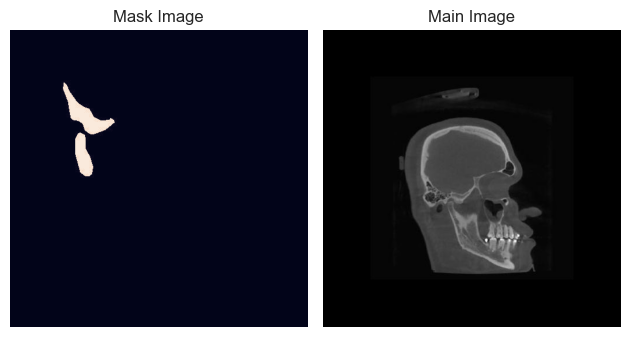

In [28]:
indexOfImage = 25
# Assuming the first image in the mask folder is the one to plot
first_mask_filename = mask_filenames[indexOfImage]
image_filename = os.path.splitext(first_mask_filename)[0] + '.jpg'

# Load and plot the mask image
mask_image = Image.open(os.path.join(masks_path, first_mask_filename))
plt.subplot(1, 2, 1)
plt.imshow(mask_image)
plt.title('Mask Image')
plt.axis('off')

# Load and plot the corresponding main image
main_image = Image.open(os.path.join(images_path, image_filename))
plt.subplot(1, 2, 2)
plt.imshow(main_image)
plt.title('Main Image')
plt.axis('off')

# Print the shapes of the images
print('Mask Image Shape:', np.array(mask_image).shape)
print('Main Image Shape:', np.array(main_image).shape)

plt.tight_layout()
plt.show()

## 5. Построение модели UNet

Далее мы определяем архитектуру модели UNet. Архитектура UNet является популярным выбором для задач сегментации изображений благодаря своей способности захватывать как низкоуровневые, так и высокоуровневые признаки.

В приведенном коде мы определяем несколько функций для построения модели UNet. Эти функции используются для создания различных блоков модели: блоков сужения (down blocks), блока узкой части (bottleneck block), блоков расширения (up blocks) и блока выхода (output block).

Функция `down_block` принимает входной тензор, количество фильтров, размер ядра, шаги, паддинг, инициализатор ядра и параметры для максимального пулинга. Она применяет два свертки с батч-нормализацией и активационными функциями, а затем выполняет максимальный пулинг. Выходом этой функции является обработанный тензор и пулинговый тензор для пропускающих соединений.

Функция `bottle_neck` принимает входной тензор, количество фильтров, размер ядра, шаги, паддинг и инициализатор ядра. Она применяет два свертки с батч-нормализацией и активационными функциями. Выходом этой функции является обработанный тензор.

Функция `up_block` принимает входной тензор, количество фильтров, тензор пропускающего соединения из соответствующего блока сужения, размер ядра, шаги, коэффициент апсемплинга, окно для максимального пулинга, паддинг и инициализатор ядра. Она выполняет апсемплинг на входном тензоре, конкатенирует его с тензором пропускающего соединения и применяет два свертки с батч-нормализацией и активационными функциями. Выходом этой функции является обработанный тензор.

Функция `output_block` принимает входной тензор, паддинг и инициализатор ядра. Она применяет два свертки, первая с 2 фильтрами и вторая с 1 фильтром, обе с активационными функциями. Выходом этой функции является финальный выходной тензор.

Наконец, мы определяем функцию `UNet`, которая создает всю модель UNet, используя ранее определенные блоки. Она принимает форму входных данных как аргумент и возвращает модель.

Я использовал похожую модель U-Net, как [здесь](https://github.com/H-arshit/UNET-On-COCO/blob/master/Keras_COCO_UNET.ipynb).

In [29]:
from Unet import UNet

## 6. Компиляция и обучение модели

В этом разделе мы скомпилируем и обучим модель UNet для сегментации изображений с использованием TensorFlow и Keras. Мы настроим модель с подходящими функциями потерь, метриками оценки и параметрами оптимизации, чтобы добиться точных результатов сегментации.

### 6.1 Компиляция модели

Сначала мы создаем экземпляр модели UNet с формой входных данных (128, 128, 3) с помощью функции `UNet`, которую мы определили ранее. Модель будет использоваться для сегментации изображений.

Затем мы компилируем модель, используя оптимизатор Adam с коэффициентом обучения 1e-4 и функцией потерь бинарной кросс-энтропии. Функция потерь бинарной кросс-энтропии обычно используется для задач бинарной сегментации, где каждый пиксель классифицируется как принадлежащий целевому объекту или нет.

Мы также включаем набор метрик для оценки производительности модели во время обучения. Метрики включают Среднее пересечение (MeanIoU), Точность (Precision), Отзывчивость (Recall), Площадь под кривой (AUC) и Точность (Accuracy). Эти метрики предоставляют ценную информацию о качестве предсказаний сегментации модели.

### 6.2 Обучение модели

Перед обучением модели мы создаем генератор для валидационных данных с использованием класса `CustomDataGenerator`. Этот генератор будет загружать и подготавливать валидационные изображения и маски в пакетах, что делает процесс оценки во время обучения эффективным.

Чтобы определить количество шагов на эпоху для обучения, мы вычисляем общее количество файлов масок для обучения и делим его на размер пакета.

Во время обучения мы используем несколько функций обратного вызова для улучшения процесса обучения модели. Обратные вызовы включают:

- **Early Stopping (Раннее прекращение)**: Этот обратный вызов следит за потерями на валидации и останавливает процесс обучения, если потери не улучшаются в течение определенного числа эпох (параметр patience). Модель восстановит веса из лучшей эпохи с наименьшими потерями на валидации.
- **Model Checkpoint (Контрольная точка модели)**: Этот обратный вызов сохраняет веса модели после каждой эпохи, если потери на валидации улучшаются. Это помогает отслеживать наилучшую модель в процессе обучения.
- **Reduce Learning Rate on Plateau (Снижение коэффициента обучения на плато)**: Этот обратный вызов снижает коэффициент обучения на 0.7, если потери на валидации не улучшаются в течение определенного числа эпох (параметр patience). Это помогает точнее настроить модель, когда прогресс замедляется.

Наконец, мы обучаем модель с помощью функции `fit`, передавая генератор для обучения, генератор для валидации, количество шагов на эпоху и желаемое количество эпох. Модель будет обучаться на предоставленном датасете, и прогресс обучения будет отображаться.

После завершения обучения мы сохраняем окончательную обученную модель в файл с именем "final_model.h5" для дальнейшего использования.

Скомпилировав и обучив модель с подходящими настройками и метриками оценки, мы можем добиться точных результатов сегментации изображений и получить модель, способную идентифицировать границы объектов на изображениях.

In [30]:
from keras.src.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.src.metrics import MeanIoU, Precision, Recall, AUC
from keras.src.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import datetime
import math
#import keras.backend as K

from tensorflow.keras.losses import Loss

In [31]:
images_path = 'coco-instance-segmentation-tmj-dataset/images/valid'
masks_path = 'coco-instance-segmentation-tmj-dataset/masks/valid'

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)

# Fit the model with the training generator

# Correcting the calculation of train_steps
train_steps = math.ceil(len(os.listdir('coco-instance-segmentation-tmj-dataset/masks/train')) / batch_size)



# Define the paths for saving model checkpoints and logs
checkpoint_path = 'coco-instance-segmentation-tmj-dataset/checkpoints/model_checkpoint.h5'
log_dir = 'coco-instance-segmentation-tmj-dataset/logs'

# Define the number of epochs and batch size
epochs = 50
batch_size = 16

# Define callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, save_best_only=True),
    ReduceLROnPlateau(factor=0.7, patience=5)
]

# Create a timestamp for unique log directory
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = log_dir + current_time

# Define loss function, metrics, and optimizer
metrics = [
    MeanIoU(num_classes=3),
    Precision(),
    Recall(),
    AUC(),
    'accuracy'
]
optimizer = Adam(learning_rate=1e-3)

# Compile the model
model = UNet(input_shape = (512,512,3))

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metrics)

# Fit the model with the training generator
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)

# Save the final trained model
model.save('coco-instance-segmentation-tmj-dataset/models/final_model.h5')

Epoch 1/50


/Users/dmitry/Developer/PycharmProjects/test2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/29 ━━━━━━━━━━━━━━━━━━━━ 6:31 30s/step - accuracy: 0.9546 - auc: 0.4923 - loss: 0.2189 - mean_io_u: 0.4971 - precision: 0.0049 - recall: 0.0129

KeyboardInterrupt: 

## 7. Making Predictions and Visualizing Results

After training the UNet model, we can now use it to make predictions on new images and visualize the segmentation results. In this section, we will load a sample batch of images from the validation data generator and generate predictions using the trained model.

### 7.1 Making Predictions

To start, we obtain a sample batch of images and their corresponding masks from the validation data generator. The `val_generator[0]` function call fetches a batch of images and masks.

We then use the trained model to generate predictions on this sample batch of images. The `model.predict` function applies the model to the images and returns the predicted masks.

### 7.2 Thresholding Predictions

The model's predictions are usually represented as continuous probability maps. To convert these probabilities into binary masks, we apply a thresholding operation. In this case, we use a threshold of 0.7 (adjustable based on requirements). Pixels with probabilities greater than 0.7 will be considered as foreground (belonging to the target object), and pixels with probabilities less than or equal to 0.7 will be considered as background.

### 7.3 Visualizing Results

We randomly select an index from the batch to visualize the results for a single sample image. The selected sample image, ground truth mask, and the predicted mask (after thresholding) are plotted side by side for comparison.

To achieve this, we create a figure with three subplots, displaying the sample image, ground truth mask, and predicted mask. Each subplot is annotated with its corresponding title for clarity.

We adjust the spacing between the subplots to ensure they are well-organized in the figure. The final figure is displayed using `plt.show()`.

By following these steps, we can easily visualize the model's segmentation performance on sample images and gain insights into how well it identifies the target objects within the images.

In [11]:
# Get a sample batch from the validation data generator
sample_images, sample_masks = val_generator[2]

# Generate predictions on the sample batch
predictions = model.predict(sample_images)

# Threshold the predictions (if needed)
threshold = 0.5  # Adjust the threshold as per your requirement
thresholded_predictions = (predictions > threshold).astype(np.uint8)

# Select a random index from the batch
idx = np.random.randint(0, sample_images.shape[0])

# Plot the sample image, ground truth mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot sample image
axes[0].imshow(sample_images[idx])
axes[0].set_title('Sample Image')

# Plot ground truth mask
axes[1].imshow(sample_masks[idx])
axes[1].set_title('Ground Truth Mask')

# Plot predicted mask
axes[2].imshow(thresholded_predictions[idx])
axes[2].set_title('Predicted Mask')

# Set common title for the figure
fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


NameError: name 'val_generator' is not defined

## 8. Visualizing Segmentation Results with Overlaid Masks

After obtaining predictions from the trained UNet model, we can visually compare the segmentation performance by overlaying the predicted masks on the sample images. This will allow us to see how well the model identifies the target objects and how closely the predicted masks align with the ground truth masks.

### 8.1 Generating Predictions

First, we fetch a sample batch of images and their corresponding masks from the validation data generator using `val_generator[0]`.

Next, we use the trained model to generate predictions on this sample batch of images. The `model.predict` function applies the model to the images and returns the predicted masks.

### 8.2 Thresholding Predictions

Similar to the previous section, we apply a thresholding operation to convert the continuous probability maps into binary masks. This time, we use a lower threshold of 0.3 (adjustable based on requirements). Pixels with probabilities greater than 0.3 will be considered as foreground, and pixels with probabilities less than or equal to 0.3 will be considered as background.

### 8.3 Visualizing Results with Overlaid Masks

To visualize the results, we select a random index from the batch to focus on a single sample image. We then create a figure with three subplots: the sample image, the ground truth mask, and the predicted mask.

For the ground truth mask subplot, we use `imshow` with the 'jet' colormap and set the alpha value to 0.7. This allows us to overlay the ground truth mask on the sample image with transparency, making it easy to compare the model's segmentation with the actual masks.

Similarly, for the predicted mask subplot, we again use `imshow` with the 'jet' colormap and set the alpha value to 0.7 to overlay the predicted mask on the sample image.

The figure is annotated with titles for each subplot, and a common title is set to summarize the purpose of the figure.

We adjust the spacing between subplots to ensure a neat layout, and then display the figure using `plt.show()`.

By following these steps, we can visually assess the quality of the model's segmentation by comparing the overlaid predicted masks with the ground truth masks and sample images. This visualization provides valuable insights into the model's performance and can help in fine-tuning the segmentation results if needed.

In [12]:
# Get a sample batch from the validation data generator
for i in range(10):
    sample_images, sample_masks = val_generator[i]

    # Generate predictions on the sample batch
    predictions = model.predict(sample_images)

    # Threshold the predictions (if needed)
    threshold = 0.5  # Adjust the threshold as per your requirement
    thresholded_predictions = (predictions > threshold).astype(np.uint8)

    # Select a random index from the batch
    idx = np.random.randint(0, sample_images.shape[0])

    # Plot the sample image, ground truth mask, and predicted mask
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Plot sample image
    axes[0].imshow(sample_images[idx])
    axes[0].set_title('Sample Image')

    # Plot ground truth mask
    axes[1].imshow(sample_images[idx])
    axes[1].imshow(sample_masks[idx], cmap='jet', alpha=0.7)
    axes[1].set_title('Ground Truth Mask')

    # Plot predicted mask
    axes[2].imshow(sample_images[idx])
    axes[2].imshow(thresholded_predictions[idx], cmap='jet', alpha=0.7)
    axes[2].set_title('Predicted Mask')

    # Set common title for the figure
    fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()


NameError: name 'val_generator' is not defined